
# 1. 
<font color='blue'> Para los datos de los ficheros "datos1.txt", "datos2.txt", "datos3.txt", "datos4.txt"se pide:
* Indica a qué distribuciones teóricas se parecen. 
*  Calcular los parámetros de dichas distribuciones.
*  Dibuja el diagrama Q-Q (quantile-quantile) para los cuartiles {0.1, 0.2, . . . , 0.9, 1} junto con la recta $y = x$, de los datos dados junto con la distribución deducida. 

</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

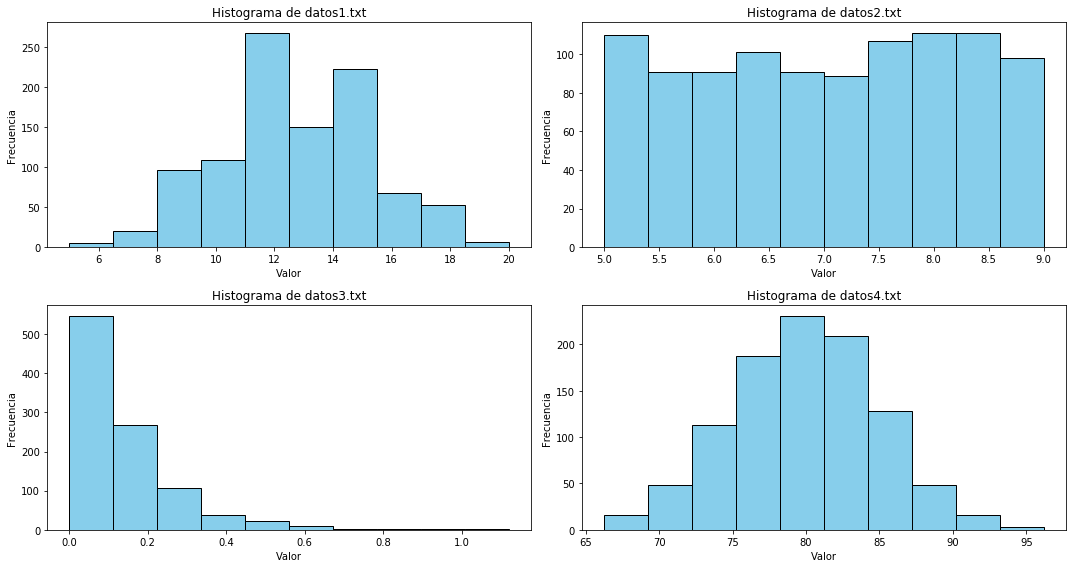

In [2]:
# Crear una figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

# Leer y graficar cada fichero
for i in range(4):  # Ajusta según cuántos ficheros tengas
    filename = f"datos{i+1}.txt"
    # Leer con separador de espacios
    df = pd.read_csv(filename, header=None, delim_whitespace=True)
    
    # Aplanar los datos a un vector 1D
    data_values = df.values.flatten()

    # Dibujar histograma
    axes[i].hist(data_values, bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de datos{i+1}.txt')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

# Ajustar diseño
plt.tight_layout()
plt.show()


* Por la forma de campana y simétrica, datos1 parece una v.a. binomial (En realidad, tiene forma de binomial y/o normal, pero toma valores enteros positivos, por lo que debe ser binomial -una v.a. normal toma valores reales, con decimales.)

* Por su forma aplanada, datos2 parece una v.a. uniforme continua. 

* Por su forma asimétrica y decreciente, datos3 parece una v.a. exponencial (si fuera Poisson, tomaría valores enteros). 

* Por su forma acampanada datos4 parece una v.a. normal (Lo mismo que dat1, pero los valores son números reales, no enteros.)


Pasamos ahora a <font color='blue'> calcular los parámetros de dichas distribuciones y dibujar el diagrama Q-Q (quantile-quantile) para los cuartiles {0.1, 0.2, . . . , 0.9, 1} junto con
la recta y = x, de los datos dados junto con la distribución deducida.</font>:

Comenzamos con datos1: Como pensamos que se trata de una v.a. binomial $X\sim Bin(n,p)$, se tendrá que  $E(X)=np$, $V(X)=npq= np(1-p) =(1-p)E(X)$, y, por tanto  $$p= 1-V(X)/E(X)$$


In [3]:
dat1 = pd.read_csv("datos1.txt", header=None, sep='\s+')
dat1 = dat1.values.flatten()

In [4]:
m=np.mean(dat1)
v=np.var(dat1)
p=1-v/m
print("Valor estimado para p:")
print(p)

Valor estimado para p:
0.4741473178542833


Además, $m=E(X)=np$ implica $n=m/p$:

In [5]:
n=m/p
print(n)

26.342023944208986


In [6]:
n=np.floor(n)
n

26.0

Es decir, hemos estimado que $X\sim {\rm Bin}(26,0.47)$. 

Vamos a ver hasta qué punto se parecen los datos dat1 a la v.a. binomial que hemos deducido:

In [7]:
# Para poder simular la binomial, la cargamos desde scipy.stats:
from scipy.stats import binom
X = binom(n,p) 

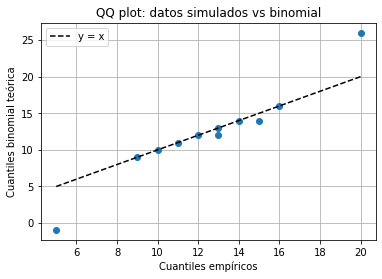

In [8]:
# Cuantiles empíricos
cuart = np.linspace(0, 1, 11)
cuar1 = np.quantile(dat1, cuart)

# Cuantiles teóricos de la binomial
cuar1_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar1, cuar1_teor, 'o')
plt.plot([min(cuar1), max(cuar1)], [min(cuar1), max(cuar1)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles binomial teórica')
plt.title('QQ plot: datos simulados vs binomial')
plt.grid(True)
plt.legend()
plt.show()

En mi opinión, se parecen bastante (aunque hay dos puntos, al inicio  y al final, que están lejos de la recta y=x)

Pasamos a datos2: Si la v.a. es U[a,b], entonces $E=E(X)=(a+b)/2$ y $V=V(X)=(b-a)^2/12$,  por lo que $\sigma=(b-a)/sqrt(12)$. Es decir: $\sqrt(12)\sigma = b-a$ y 
$2E= b+a$, de donde concluimos que
$$b = (2E+\sqrt(12)\sigma)/2$$ 
$$a = (2E-\sqrt(12)\sigma)/2$$

In [9]:
dat2 = pd.read_csv("datos2.txt", header=None, sep='\s+')
dat2 = dat2.values.flatten()
m=np.mean(dat2)
v=np.var(dat2)
s=v**0.5
b=(2*m+(12**0.5)*s)/2
a=(2*m-(12**0.5)*s)/2
print("El intervalo estimado es:")
print([a,b])

El intervalo estimado es:
[5.002582708298033, 9.043937291701969]



Ahora comprobemos hasta qué punto se parecen:



In [10]:
# Para poder simular la v.a, la cargamos desde scipy.stats:
from scipy.stats import uniform
X=uniform(a,b-a)

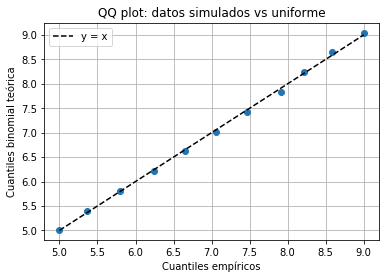

In [11]:
cuar1 = np.quantile(dat2, cuart)

# Cuantiles teóricos de la uniforme
cuar1_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar1, cuar1_teor, 'o')
plt.plot([min(cuar1), max(cuar1)], [min(cuar1), max(cuar1)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles binomial teórica')
plt.title('QQ plot: datos simulados vs uniforme')
plt.grid(True)
plt.legend()
plt.show()

Otro modo que funciona cuando la muestra es grande: 

Si la muestra es grande se puede estimar $$a=\min(valores),\ \quad b=\max(valores)$$ 
Sin embargo, el otro método funciona mejor cuando hay pocos datos.

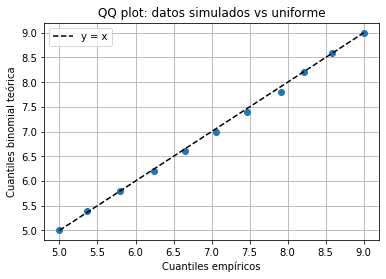

In [12]:
a=min(dat2)
b=max(dat2)
X=uniform(a,b-a)
# Cuantiles teóricos de la uniforme
cuar1_teor = X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar1, cuar1_teor, 'o')
plt.plot([min(cuar1), max(cuar1)], [min(cuar1), max(cuar1)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles binomial teórica')
plt.title('QQ plot: datos simulados vs uniforme')
plt.grid(True)
plt.legend()
plt.show()

Pasamos a datos3, que se paracen a una v.a. esponencial.  
Primero calculamos la media y la varianza de los datos:

In [13]:
dat3 = pd.read_csv("datos3.txt", header=None, sep='\s+')
dat3 = dat3.values.flatten()


In [14]:
m=np.mean(dat3)
v=np.var(dat3)
print("La media es:")
print(m)
print("La varianza es:")
print(v)

La media es:
0.13854000000000002
La varianza es:
0.0178758684



Si $X\simeq Exp(\lambda)$, entonces $E(X)=1/\lambda$  y por tanto $\lambda=1/E(X)$, por lo que hacemos:



In [15]:
L=1/m
print("El parámetro estimado es lambda=")
print(L)

El parámetro estimado es lambda=
7.218131947451998


In [16]:
# Para poder simular la v.a, la cargamos desde scipy.stats:
from scipy.stats import expon
X=expon(loc=0,scale=m) 
# En Python se usa la media para definir la exp. y loc=0 significa que empezamos a contar en t=0

Veamos ahora si se parecen los datos a la v.a. estimada:

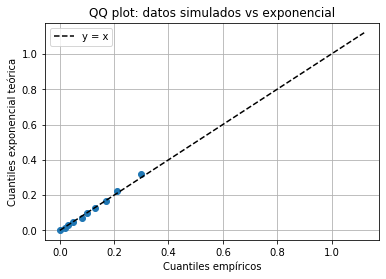

In [17]:
cuar3 = np.quantile(dat3, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar3, cuar_teor, 'o')
plt.plot([min(cuar3), max(cuar3)], [min(cuar3), max(cuar3)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles exponencial teórica')
plt.title('QQ plot: datos simulados vs exponencial')
plt.grid(True)
plt.legend()
plt.show()

Sí que se parecen los datos a los de la v.a. exponencial que hemos estimado.

Los últimos datos parecen los de una Normal. Veamos qué media y que varianza usamos:

In [18]:
dat4 = pd.read_csv("datos4.txt", header=None, sep='\s+')
dat4 = dat4.values.flatten()

In [19]:
m=np.mean(dat4)
s=(np.var(dat4))**0.5
print("Media estimada:")
print(m)
print("Desv. Típica estimada:")
print(s)

Media estimada:
79.93408000000001
Desv. Típica estimada:
4.9226856037736155


In [20]:
# Para poder simular la v.a, la cargamos desde scipy.stats:
from scipy.stats import norm
X=norm(m,s)

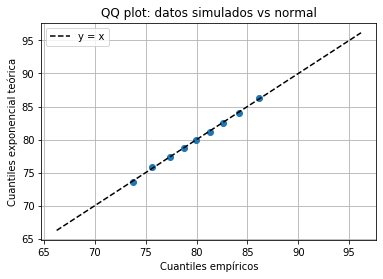

In [21]:
cuar4 = np.quantile(dat4, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar4, cuar_teor, 'o')
plt.plot([min(cuar4), max(cuar4)], [min(cuar4), max(cuar4)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles exponencial teórica')
plt.title('QQ plot: datos simulados vs normal')
plt.grid(True)
plt.legend()
plt.show()

# 2. 
<font color='blue'> Haz una función que coja 12 valores a suertes de una variable uniforme con a = 0 y b = 1, los sume y luego reste 6.
* ¿Qué media y varianza debe tener esta variable?
* Calcula 1000 datos con esta función y haz su histograma ¿Qué tipo de variable parece que es?
* Calcula sus parámetros y comprueba con un diagrama Q-Q si los datos se parecen a esa variable.
* Modifica la función anterior para que los datos tengan la media y desviación típica que se quiera.
</font>

<strong> Solución:</strong> Construimos una v.a. que toma 12 valores a suertes de una variable uniforme con a = 0 y b = 1, los suma y luego les resta 6:



In [22]:
from scipy.stats import uniform
X=uniform(0,1)
muestras=X.rvs(12)
Y=sum(muestras)-6
Y

1.0186109745371192

Si queremos ver lo anterior como una función, la programación es ligeramente distinta:

In [23]:
X=uniform(0,1)
def Y():
    return sum(X.rvs(12))-6

In [24]:
Y()

0.06700149752554196

¿Qué media y varianza debe tener esta variable? Como $Y=(X_1+...+X_{12})-6$, donde las v.a. $X_i$ son independientes y todas son $X\simeq {\rm Unif}[0,1]$, entonces $$E(Y)=12*E(X)-6=12*1/2-6=6-6=0$$ y $$V(Y)= 12V(X)=(1/12)12=1$$ 
(por ser las $X_i$ v.a. independientes)   

Conclusión: $E(Y)=0$, $V(Y)=1$.

<font color='blue'> Calcula 1000 datos con esta función y haz su histograma ¿Qué tipo de variable parece que es? </font>

In [25]:
dat=[]
for i in np.arange(1,1000):
    dat=np.append(dat,Y())
print("La media de los datos simulados es:")
print(np.mean(dat))
print("La varianza de los datos simulados es:")
print(np.var(dat))



La media de los datos simulados es:
-0.011045455944001284
La varianza de los datos simulados es:
0.979269490652896


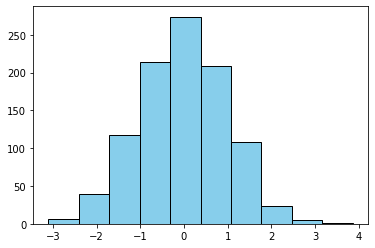

In [26]:
# Dibujar histograma
# Dibujar histograma
plt.hist(dat, bins=10, color='skyblue', edgecolor='black')
plt.show()

El histograma parece el de una v.a. normal. 

Calcula sus parámetros y comprueba con un diagrama Q-Q si los datos se parecen a esa variable.

Debería ser $Y\sim N(0,1)$, puesto que hemos determinado antes su media y su varianza teóricas. 

In [27]:
from scipy.stats import norm
Z=norm(0,1)

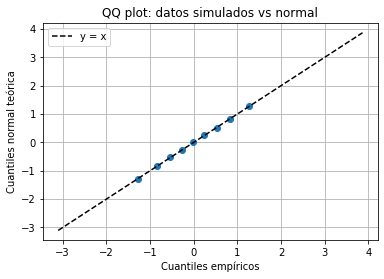

In [28]:
cuart = np.linspace(0, 1, 11)
cuar = np.quantile(dat, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =Z.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar, cuar_teor, 'o')
plt.plot([min(cuar), max(cuar)], [min(cuar), max(cuar)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles normal teórica')
plt.title('QQ plot: datos simulados vs normal')
plt.grid(True)
plt.legend()
plt.show()

Está claro que es una v.a. normal N(0,1) (como esperábamos, gracias al teorema central del límite)

<font color='blue'> Modifica la función anterior para que los datos tengan la media y desviación típica que se quiera. </font>

In [29]:
def N(m,s):
    return s*np.sum(Z.rvs(1))+m

Veamos que en efecto, esto produce una v.a. N(m,s). Tomamos, por ejemplo, m=2,s=3:

In [30]:
m,s=[2,3]
dat1=[]
for i in np.arange(1,1000):
    dat1=np.append(dat1,N(m,s))
print("La media de los datos simulados es:")
print(np.mean(dat1))
print("La desviación típica de los datos simulados es:")
print(np.var(dat1)**0.5)

La media de los datos simulados es:
2.059427755890491
La desviación típica de los datos simulados es:
2.9278252083750043


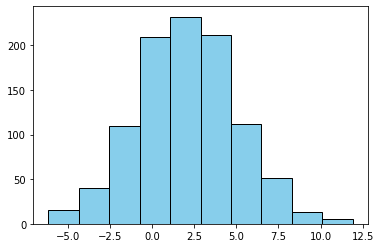

In [31]:
plt.hist(dat1, bins=10, color='skyblue', edgecolor='black')
plt.show()

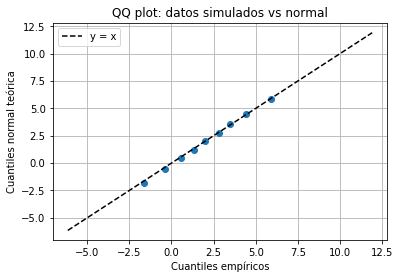

In [32]:
Z=norm(m,s)
cuart = np.linspace(0, 1, 11)
cuar = np.quantile(dat1, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =Z.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar, cuar_teor, 'o')
plt.plot([min(cuar), max(cuar)], [min(cuar), max(cuar)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles normal teórica')
plt.title('QQ plot: datos simulados vs normal')
plt.grid(True)
plt.legend()
plt.show()

# 3. 
<font color='blue'> Haz una función que tome un valor x a suertes entre 0 y 1 y devuelva 
$-\log(1-x)$. 

* Calcula 100000 datos con esta función y haz su histograma ¿Qué tipo de variable parece que es?
*  Calcula sus parámetros y comprueba con un diagrama Q-Q si los datos se parecen a esa variable.
 </font> 


La forma sencilla de definir una función coja un valor x a suertes entre 0 y 1 y devuelva 

In [33]:
from scipy.stats import uniform
X=uniform(0,1)

In [34]:
def Y():
    return -np.log(1-sum(X.rvs(1)))

In [35]:
Y()

0.8009086918126221

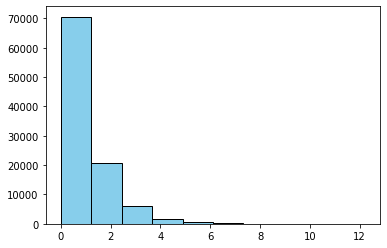

In [36]:
dat=-np.log(1-X.rvs(100000))
plt.hist(dat, bins=10, color='skyblue', edgecolor='black')
plt.show()

Los datos parecen provenir de una exponencial.

In [37]:
m=np.mean(dat)
v=np.var(dat)
s=v**0.5
print("La media de los datos es:")
print(m)
print("La varianza de los datos es:")
print(v)
print("La desv. típica de los datos es:")
print(s)

La media de los datos es:
0.9987380944080613
La varianza de los datos es:
0.9910025965207349
La desv. típica de los datos es:
0.9954911333210029


Ahora comprobemos hasta qué punto se parecen:

In [38]:
# Para poder simular la v.a, la cargamos desde scipy.stats:
from scipy.stats import expon
X=expon(loc=0,scale=m) 
# En Python se usa la media para definir la exp. y loc=0 significa que empezamos a contar en t=0

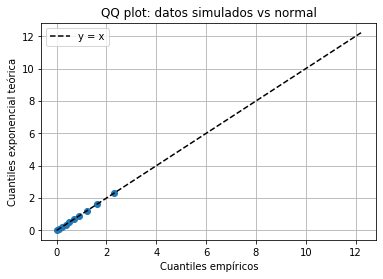

In [39]:
cuart=np.linspace(0,1,11)
cuar = np.quantile(dat, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar, cuar_teor, 'o')
plt.plot([min(cuar), max(cuar)], [min(cuar), max(cuar)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles exponencial teórica')
plt.title('QQ plot: datos simulados vs normal')
plt.grid(True)
plt.legend()
plt.show()

El parecido es también evidente en este caso.

# 4. 
<font color='blue'> Crea una variable llamada valores que contenga los números del 0 al 1 con incremento de 0.1 .
*  Haz una función que saque a suertes 1000 valores de esa lista usando sample y devuelva la primera posición de la lista cuyo valor sea ≥ 0,8 (esto se hace con la orden which(lista $>=$ 0.8)[1])
*  Calcula 1000 datos con esta función y haz su histograma ¿Qué tipo de variable parece que es?
*  Calcula sus parámetros y comprueba con un diagrama Q-Q si los datos se parecen a esa variable
*  Modifica la función anterior para que los datos tengan la media y desviación típica que se quiera
*  Crea una variable llamada valores que contenga los números del 0 al 1 con incremento de 0.1 .
</font>

In [40]:
val=np.linspace(0,1,11)
print(val)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [41]:
def X():
    datos = np.random.choice(val, size=1000, replace=True)
    return next(i for i, x in enumerate(datos) if x >= 0.8)

In [42]:
X()

2

Tomamos 1000 muestras

In [43]:
dat1=[]
for i in np.arange(1,1000):
    dat1=np.append(dat1,X())
print("La media de los datos simulados es:")
print(np.mean(dat1))
print("La desviación típica de los datos simulados es:")
print(np.var(dat1)**0.5)

La media de los datos simulados es:
2.670670670670671
La desviación típica de los datos simulados es:
3.0545016993417984


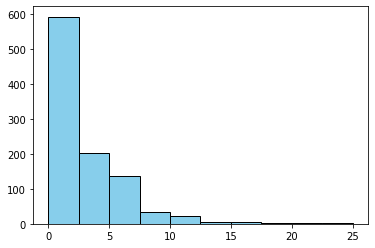

In [44]:
plt.hist(dat1, bins=10, color='skyblue', edgecolor='black')
plt.show()

 Parece una v.a. geométrica (decrece esponencialmente y toma valores enteros)
 Si $X\simeq Geom(p)$ = Numero de fallos hasta un acierto, entonces 
$$E(X)=(1-p)/p, \quad V(X)=(1-p)/p^2 $$
 Por tanto, $pE(X)=p^2V(X)$ y $p=E(X)/V(X)$

In [45]:
p=np.mean(dat1)/np.var(dat1)
p

0.28624611092078145

In [46]:
# Para poder simular la v.a, la cargamos desde scipy.stats:
from scipy.stats import geom
X=geom(p) 

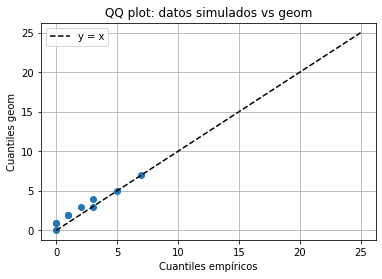

In [47]:
cuart=np.linspace(0,1,11)
cuar = np.quantile(dat1, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar, cuar_teor, 'o')
plt.plot([min(cuar), max(cuar)], [min(cuar), max(cuar)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles geom')
plt.title('QQ plot: datos simulados vs geom')
plt.grid(True)
plt.legend()
plt.show()

# 5. 
<font color='blue'> Crea una variable llamada valores que contenga los números del 0 al 1 con incremento de 0.1 .
* Haz una función que saque a suertes 1000 valores de esa lista usando sample y devuelva el número de veces en las que el valor obtenido es ≥ 0,8 (esto se hace con la orden length(which(lista $>=$ 0.8)) 
* Calcula 1000 datos con esta función y haz su histograma ¿Qué tipo de variable parece que es?
* Calcula sus parámetros y comprueba con un diagrama Q-Q si los datos se parecen a esa variable.
* Modifica la función anterior para que los datos tengan la media y desviación típica que se quiera.
</font> 

In [48]:
val=np.linspace(0,1,11)
print(val)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [49]:
def X():
    datos = np.random.choice(val, size=1000, replace=True)
    return np.sum(datos >= 0.8)

In [50]:
X()

278

In [51]:
dat1=[]
for i in np.arange(1,1000):
    dat1=np.append(dat1,X())
print("La media de los datos simulados es:")
m=np.mean(dat1)
print(m)
print("La varianza de los datos simulados es:")
v=np.var(dat1)
print(v)

La media de los datos simulados es:
273.1541541541541
La varianza de los datos simulados es:
186.58684710736762


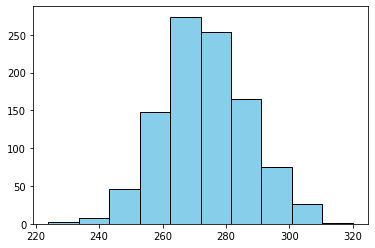

In [52]:
plt.hist(dat1, bins=10, color='skyblue', edgecolor='black')
plt.show()

Por cómo se ha generado, es claro que la variable debe ser binomial de parámetros 1000 y 3/11. Veamos qué es lo que nos dicen los datos generados (es decir, veamos lo que dicen esos datos por sí mismos, ignorando el modo en que se han generado). El resultado debería parecerse a una binomial $\textbf{Binom}(1000,3/11)$. De hecho, el histograma sí que parece el de una binomial. Los parámetros los estimamos a partir de los datos.
Como la v.a. binomial $X\sim Bin(n,p)$ tiene $$E(X)=np, \quad  V(X)=npq= np(1-p) =(1-p)E(X)$$
 entonces $$p= 1-V(X)/E(X)$$




In [53]:
p=1-v/m
print(p)

0.3169174099323139


In [54]:
m/p

861.9095877771229

In [55]:
n=np.floor(m/p)
n

861.0

In [56]:
from scipy.stats import binom
X=binom(n,p) 

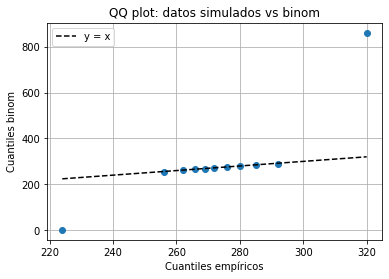

In [57]:
cuart=np.linspace(0,1,11)
cuar = np.quantile(dat1, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar, cuar_teor, 'o')
plt.plot([min(cuar), max(cuar)], [min(cuar), max(cuar)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles binom')
plt.title('QQ plot: datos simulados vs binom')
plt.grid(True)
plt.legend()
plt.show()


Casi no hay diferencia...


In [58]:
from scipy.stats import binom
X=binom(1000,3/11) 

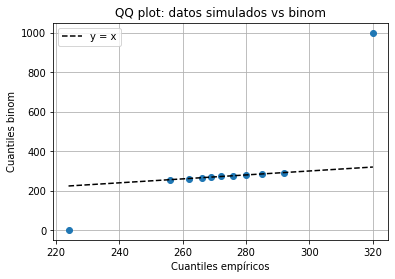

In [59]:
cuart=np.linspace(0,1,11)
cuar = np.quantile(dat1, cuart)

# Cuantiles teóricos de la uniforme
cuar_teor =X.ppf(cuart)

# Gráfico de cuantiles empíricos vs teóricos
plt.plot(cuar, cuar_teor, 'o')
plt.plot([min(cuar), max(cuar)], [min(cuar), max(cuar)], 'k--', label='y = x')
plt.xlabel('Cuantiles empíricos')
plt.ylabel('Cuantiles binom')
plt.title('QQ plot: datos simulados vs binom')
plt.grid(True)
plt.legend()
plt.show()